In [2]:
import pickle
from collections import namedtuple
import pandas as pd
import numpy as np
from importlib import reload
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.dates as mdates
import datetime

# bench_util module is in the parent directory, because it will be part of
# the production code.  Add the parent directory to the Path so Python can
# import from there
sys.path.insert(0, '../')   
import bench_util as bu
import graph_util as gu

## Unpickle the Dataframe for Preprocessed Utility Data & Make Utility Function Object

In [3]:
# Unpickle the pre-processed DataFrame
df = pickle.load(open('dfu3.pkl', 'rb'))

# Unpickle the raw utility bill DataFrame, which is needed below to make
# the utility function object.
df_raw = pickle.load(open('df_raw.pkl', 'rb'))

df.head()  # the processed data

,site_id,service_type,cal_year,cal_mo,item_desc,units,cost,days_served,usage,fiscal_year,fiscal_mo,mmbtu
0,03,Electricity,2010,7,Electricity charge,-,24.137931,35.0,0.000000,2011,1,0.000000
1,03,Electricity,2010,7,Electricity charge,kWh,1304.274655,9.5,6656.551724,2011,1,22.712154
2,03,Electricity,2010,8,Electricity charge,-,39.498433,62.0,0.000000,2011,2,0.000000
3,03,Electricity,2010,8,Electricity charge,kWh,4940.646254,31.0,26822.236155,2011,2,91.517470
4,03,Electricity,2010,9,Electricity charge,-,16.363636,27.0,0.000000,2011,3,0.000000


In [4]:
# this is only needed to update any code changes I may have made
# since last importing the module above.
reload(bu) 
reload(gu)

# Make an object that has the various utility functions.
# The object needs access to the raw utility bill DataFrame and the spreadsheet
# containing other application data.
ut = bu.Util(df_raw, '../data/Other_Building_Data.xlsx')

In [5]:
# Testing site.  Final code will loop through all sites
site = 'DIPMP1'

# DataFrame for Energy Use Overview Report Page


In [6]:
# From the main DataFrame, get only the rows for this site, and only get
# the needed columns for this analysis
usage_df1 = df.query('site_id == @site')[['service_type', 'fiscal_year', 'fiscal_mo', 'mmbtu']]
usage_df1.head()

,service_type,fiscal_year,fiscal_mo,mmbtu
27864,Electricity,2011,1,232.491327
27865,Electricity,2011,1,0.000000
27866,Electricity,2011,1,0.000000
27867,Electricity,2011,1,NaN
27868,Electricity,2011,2,423.797568


In [7]:
usage_df1.query("service_type == 'Natural Gas'")

,service_type,fiscal_year,fiscal_mo,mmbtu
28160,Natural Gas,2011,1,1.954452
28161,Natural Gas,2011,1,NaN
28162,Natural Gas,2011,2,39.266710
28163,Natural Gas,2011,2,NaN
28164,Natural Gas,2011,3,16.380701
28165,Natural Gas,2011,3,NaN
28166,Natural Gas,2011,4,4.297794
28167,Natural Gas,2011,4,NaN
28168,Natural Gas,2011,5,4.973654
28169,Natural Gas,2011,5,NaN


In [8]:
usage_df2 = pd.pivot_table(
    usage_df1, 
    values='mmbtu', 
    index=['fiscal_year'], 
    columns=['service_type'],
    aggfunc=np.sum
)

usage_df2 = usage_df2.drop(labels=['Sewer', 'Water'], axis=1)

usage_df2

service_type,Electricity,Natural Gas,Oil #1
fiscal_year,,,
2011,4465.042258,909.064800,6243.551471
2012,4516.043334,7309.068619,668.293467
2013,4760.229306,7748.241853,798.431211
2014,4665.265022,7340.779372,612.212365
2015,4339.763318,4328.011355,2470.153986
2016,5005.284236,0.000000,6761.947500
2017,3335.377486,2686.272000,2137.725000


In [9]:
# Add in columns for the missing services
missing_services = bu.missing_energy_services(usage_df2.columns)
bu.add_columns(usage_df2, missing_services)
usage_df2

service_type,Electricity,Natural Gas,Oil #1,Steam
fiscal_year,,,,
2011,4465.042258,909.064800,6243.551471,0.0
2012,4516.043334,7309.068619,668.293467,0.0
2013,4760.229306,7748.241853,798.431211,0.0
2014,4665.265022,7340.779372,612.212365,0.0
2015,4339.763318,4328.011355,2470.153986,0.0
2016,5005.284236,0.000000,6761.947500,0.0
2017,3335.377486,2686.272000,2137.725000,0.0


In [10]:
# Add a Total column that sums the other columns
usage_df2['Total_Use'] = usage_df2.sum(axis=1)
usage_df2

service_type,Electricity,Natural Gas,Oil #1,Steam,Total_Use
fiscal_year,,,,,
2011,4465.042258,909.064800,6243.551471,0.0,11617.658529
2012,4516.043334,7309.068619,668.293467,0.0,12493.405421
2013,4760.229306,7748.241853,798.431211,0.0,13306.902370
2014,4665.265022,7340.779372,612.212365,0.0,12618.256760
2015,4339.763318,4328.011355,2470.153986,0.0,11137.928659
2016,5005.284236,0.000000,6761.947500,0.0,11767.231736
2017,3335.377486,2686.272000,2137.725000,0.0,8159.374486


In [11]:
# Create a list of columns to loop through and calculate percent total energy
usage_cols = list(usage_df2.columns.values)
print (usage_cols)
usage_cols.remove('Total_Use')

for col in usage_cols:
    col_name = col + "_pct_total_energy"
    usage_df2[col_name] = usage_df2[col] / usage_df2.Total_Use

usage_df2

['Electricity', 'Natural Gas', 'Oil #1', 'Steam', 'Total_Use']


service_type,Electricity,Natural Gas,Oil #1,Steam,Total_Use,Electricity_pct_total_energy,Natural Gas_pct_total_energy,Oil #1_pct_total_energy,Steam_pct_total_energy
fiscal_year,,,,,,,,,
2011,4465.042258,909.064800,6243.551471,0.0,11617.658529,0.384332,0.078249,0.537419,0.0
2012,4516.043334,7309.068619,668.293467,0.0,12493.405421,0.361474,0.585034,0.053492,0.0
2013,4760.229306,7748.241853,798.431211,0.0,13306.902370,0.357726,0.582272,0.060001,0.0
2014,4665.265022,7340.779372,612.212365,0.0,12618.256760,0.369723,0.581759,0.048518,0.0
2015,4339.763318,4328.011355,2470.153986,0.0,11137.928659,0.389638,0.388583,0.221779,0.0
2016,5005.284236,0.000000,6761.947500,0.0,11767.231736,0.425358,0.000000,0.574642,0.0
2017,3335.377486,2686.272000,2137.725000,0.0,8159.374486,0.408779,0.329225,0.261996,0.0


In [12]:
# Add in degree days
months_present = bu.months_present(usage_df1)
deg_days = ut.degree_days_yearly(months_present, site)
usage_df2['hdd'] = deg_days
usage_df2

service_type,Electricity,Natural Gas,Oil #1,Steam,Total_Use,Electricity_pct_total_energy,Natural Gas_pct_total_energy,Oil #1_pct_total_energy,Steam_pct_total_energy,hdd
fiscal_year,,,,,,,,,,
2011,4465.042258,909.064800,6243.551471,0.0,11617.658529,0.384332,0.078249,0.537419,0.0,13802
2012,4516.043334,7309.068619,668.293467,0.0,12493.405421,0.361474,0.585034,0.053492,0.0,12393
2013,4760.229306,7748.241853,798.431211,0.0,13306.902370,0.357726,0.582272,0.060001,0.0,12171
2014,4665.265022,7340.779372,612.212365,0.0,12618.256760,0.369723,0.581759,0.048518,0.0,13802
2015,4339.763318,4328.011355,2470.153986,0.0,11137.928659,0.389638,0.388583,0.221779,0.0,12393
2016,5005.284236,0.000000,6761.947500,0.0,11767.231736,0.425358,0.000000,0.574642,0.0,12171
2017,3335.377486,2686.272000,2137.725000,0.0,8159.374486,0.408779,0.329225,0.261996,0.0,13219


In [13]:
# Add in a column to show the numbers of months present for each year
# This will help to identify partial years.
mo_count = bu.month_count(months_present)
usage_df2['month_count'] = mo_count
usage_df2

service_type,Electricity,Natural Gas,Oil #1,Steam,Total_Use,Electricity_pct_total_energy,Natural Gas_pct_total_energy,Oil #1_pct_total_energy,Steam_pct_total_energy,hdd,month_count
fiscal_year,,,,,,,,,,,
2011,4465.042258,909.064800,6243.551471,0.0,11617.658529,0.384332,0.078249,0.537419,0.0,13802,12
2012,4516.043334,7309.068619,668.293467,0.0,12493.405421,0.361474,0.585034,0.053492,0.0,12393,12
2013,4760.229306,7748.241853,798.431211,0.0,13306.902370,0.357726,0.582272,0.060001,0.0,12171,12
2014,4665.265022,7340.779372,612.212365,0.0,12618.256760,0.369723,0.581759,0.048518,0.0,13802,12
2015,4339.763318,4328.011355,2470.153986,0.0,11137.928659,0.389638,0.388583,0.221779,0.0,12393,12
2016,5005.284236,0.000000,6761.947500,0.0,11767.231736,0.425358,0.000000,0.574642,0.0,12171,12
2017,3335.377486,2686.272000,2137.725000,0.0,8159.374486,0.408779,0.329225,0.261996,0.0,13219,10


In [14]:
# Calculate total heat energy and normalized heating usage
usage_df2['total_heat_energy'] = usage_df2['Natural Gas'] + usage_df2['Steam'] + usage_df2['Oil #1']
usage_df2['total_specific_heat_usage'] = usage_df2['total_heat_energy'] * 1000 / usage_df2.hdd
usage_df2

service_type,Electricity,Natural Gas,Oil #1,Steam,Total_Use,Electricity_pct_total_energy,Natural Gas_pct_total_energy,Oil #1_pct_total_energy,Steam_pct_total_energy,hdd,month_count,total_heat_energy,total_specific_heat_usage
fiscal_year,,,,,,,,,,,,,
2011,4465.042258,909.064800,6243.551471,0.0,11617.658529,0.384332,0.078249,0.537419,0.0,13802,12,7152.616271,518.230421
2012,4516.043334,7309.068619,668.293467,0.0,12493.405421,0.361474,0.585034,0.053492,0.0,12393,12,7977.362086,643.699031
2013,4760.229306,7748.241853,798.431211,0.0,13306.902370,0.357726,0.582272,0.060001,0.0,12171,12,8546.673064,702.216175
2014,4665.265022,7340.779372,612.212365,0.0,12618.256760,0.369723,0.581759,0.048518,0.0,13802,12,7952.991738,576.220239
2015,4339.763318,4328.011355,2470.153986,0.0,11137.928659,0.389638,0.388583,0.221779,0.0,12393,12,6798.165341,548.548805
2016,5005.284236,0.000000,6761.947500,0.0,11767.231736,0.425358,0.000000,0.574642,0.0,12171,12,6761.947500,555.578630
2017,3335.377486,2686.272000,2137.725000,0.0,8159.374486,0.408779,0.329225,0.261996,0.0,13219,10,4823.997000,364.929042


In [15]:
# Reverse the DataFrame
usage_df2.sort_index(ascending=False, inplace=True)
usage_df2

service_type,Electricity,Natural Gas,Oil #1,Steam,Total_Use,Electricity_pct_total_energy,Natural Gas_pct_total_energy,Oil #1_pct_total_energy,Steam_pct_total_energy,hdd,month_count,total_heat_energy,total_specific_heat_usage
fiscal_year,,,,,,,,,,,,,
2017,3335.377486,2686.272000,2137.725000,0.0,8159.374486,0.408779,0.329225,0.261996,0.0,13219,10,4823.997000,364.929042
2016,5005.284236,0.000000,6761.947500,0.0,11767.231736,0.425358,0.000000,0.574642,0.0,12171,12,6761.947500,555.578630
2015,4339.763318,4328.011355,2470.153986,0.0,11137.928659,0.389638,0.388583,0.221779,0.0,12393,12,6798.165341,548.548805
2014,4665.265022,7340.779372,612.212365,0.0,12618.256760,0.369723,0.581759,0.048518,0.0,13802,12,7952.991738,576.220239
2013,4760.229306,7748.241853,798.431211,0.0,13306.902370,0.357726,0.582272,0.060001,0.0,12171,12,8546.673064,702.216175
2012,4516.043334,7309.068619,668.293467,0.0,12493.405421,0.361474,0.585034,0.053492,0.0,12393,12,7977.362086,643.699031
2011,4465.042258,909.064800,6243.551471,0.0,11617.658529,0.384332,0.078249,0.537419,0.0,13802,12,7152.616271,518.230421


## Create Energy Usage Overview Graphs

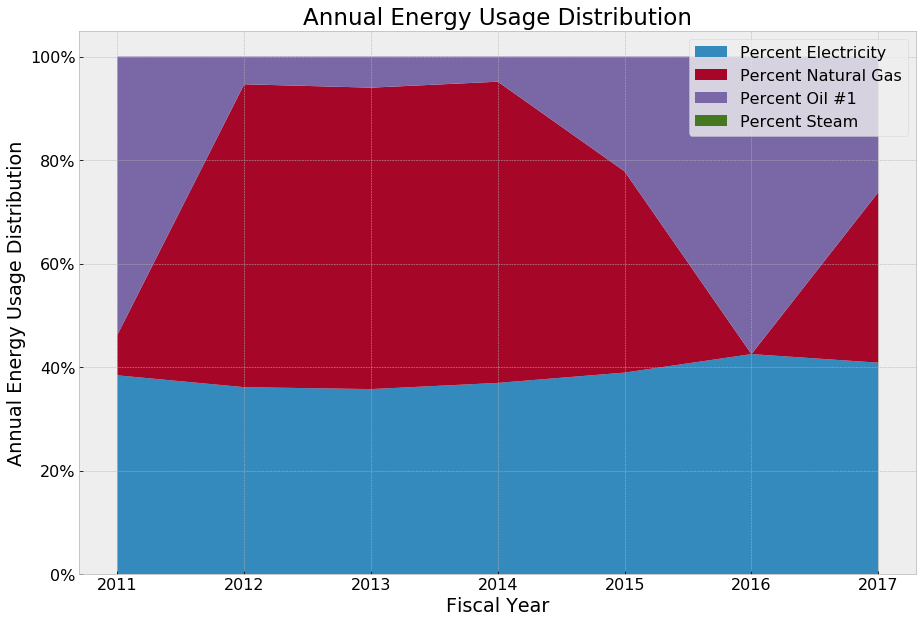

In [32]:
# Reset the index so the fiscal year column can be passed to the graphing function
reset_usage_df2 = usage_df2.reset_index()

file_name = site + "_graph_pg4_g2.png"

# Create the area graph
gu.area_use_distribution(reset_usage_df2, 'fiscal_year', usage_cols, file_name)

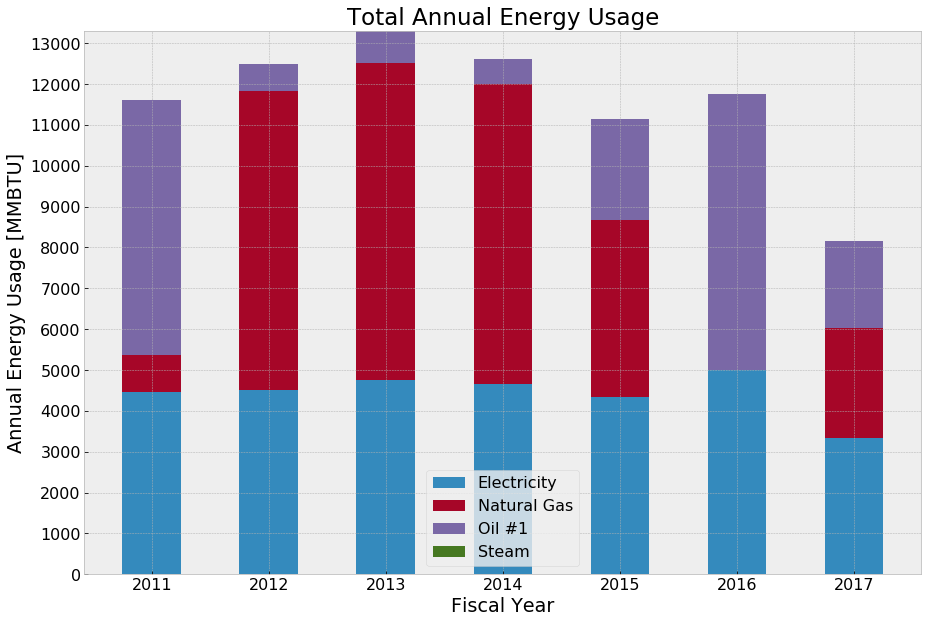

In [33]:
stacked_bar_filename = site + "_graph_pg4_g1.png"

gu.energy_use_stacked_bar(reset_usage_df2, 'fiscal_year', usage_cols, stacked_bar_filename)

In [16]:
# Export the rows of the DataFrame into a list of dictionaries for use
# in the template.  Rename columns to match template variables.
usage_dict = bu.df_to_dictionaries(usage_df2, change_names={'Natural Gas': 'natural_gas', 'Oil #1': 'fuel_oil'})
usage_dict

[{'Electricity': 3335.3774864516131,
  'Electricity_pct_total_energy': 0.4087785763467412,
  'Natural Gas_pct_total_energy': 0.32922523711351531,
  'Oil #1_pct_total_energy': 0.26199618653974338,
  'Steam': 0.0,
  'Steam_pct_total_energy': 0.0,
  'Total_Use': 8159.3744864516138,
  'fiscal_year': 2017,
  'fuel_oil': 2137.7249999999999,
  'hdd': 13219.0,
  'month_count': 10.0,
  'natural_gas': 2686.2719999999999,
  'total_heat_energy': 4823.9969999999994,
  'total_specific_heat_usage': 364.92904153112937},
 {'Electricity': 5005.2842360483864,
  'Electricity_pct_total_energy': 0.42535783677268141,
  'Natural Gas_pct_total_energy': 0.0,
  'Oil #1_pct_total_energy': 0.57464216322731854,
  'Steam': 0.0,
  'Steam_pct_total_energy': 0.0,
  'Total_Use': 11767.231736048387,
  'fiscal_year': 2016,
  'fuel_oil': 6761.9474999999993,
  'hdd': 12171.0,
  'month_count': 12.0,
  'natural_gas': 0.0,
  'total_heat_energy': 6761.9474999999993,
  'total_specific_heat_usage': 555.57862952920868},
 {'Electri

# Create Usage Pie Charts

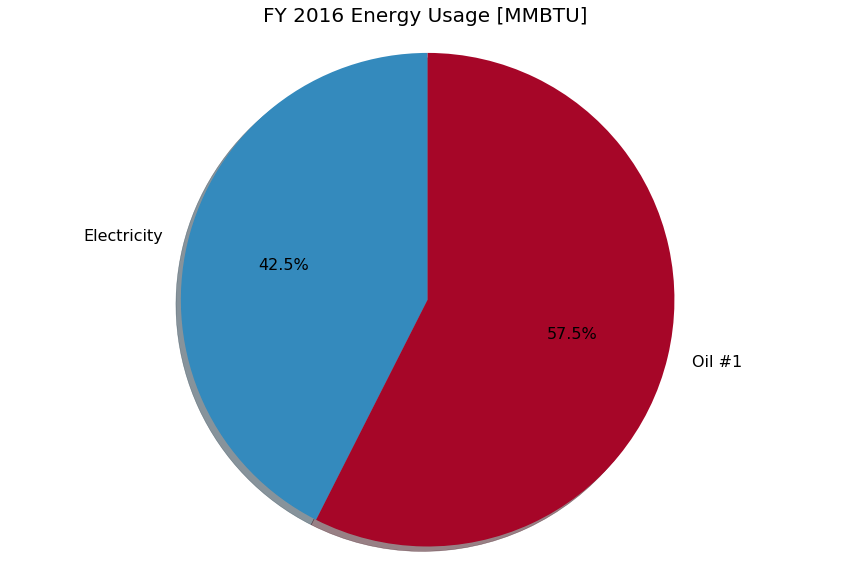

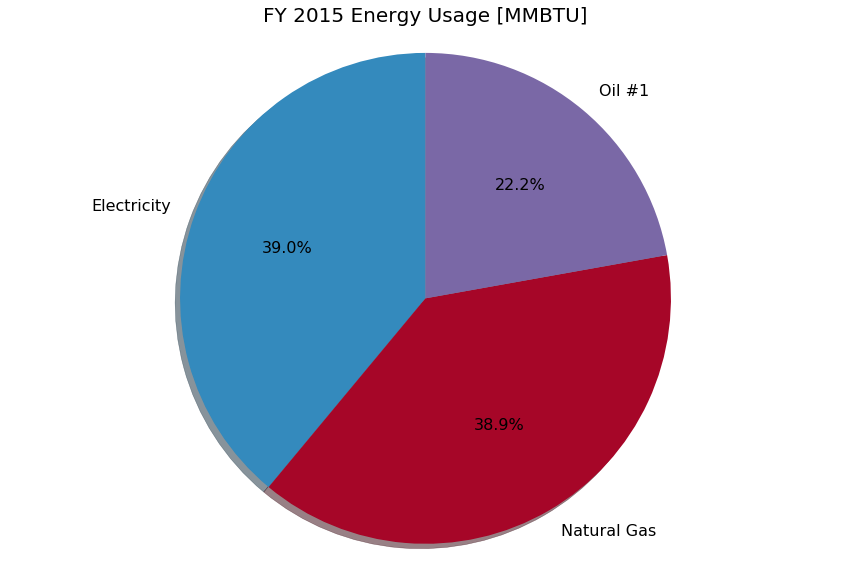

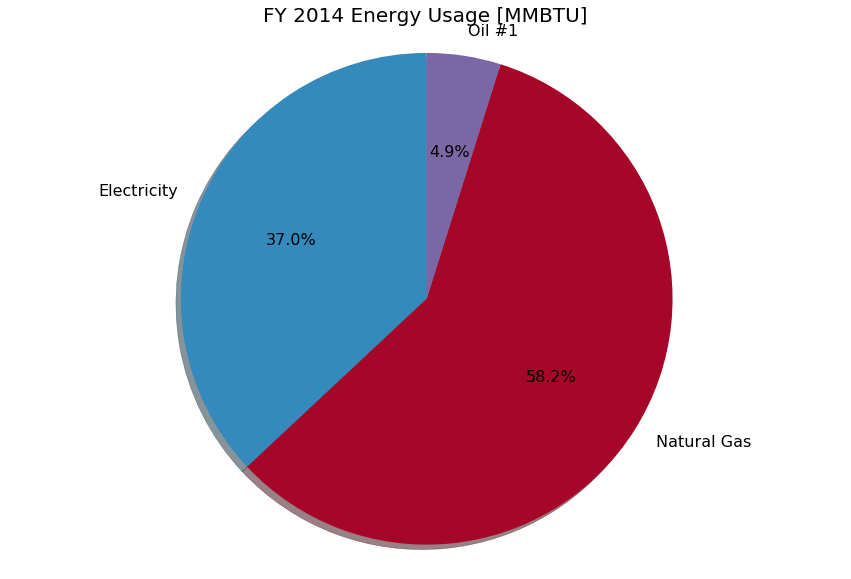

In [17]:
pie_filename = site + "_graph_pg5_"
gu.usage_pie_charts(usage_df2, usage_cols, 1, pie_filename)

# Electrical Usage Analysis

In [18]:
site_df = df.query("site_id == @site")
site_df.head()

,site_id,service_type,cal_year,cal_mo,item_desc,units,cost,days_served,usage,fiscal_year,fiscal_mo,mmbtu
27864,DIPMP1,Electricity,2010,7,Energy charge,kWh,3055.367586,16.5,68139.310345,2011,1,232.491327
27865,DIPMP1,Electricity,2010,7,KW Charge,kW,0.000000,16.5,158.627586,2011,1,0.000000
27866,DIPMP1,Electricity,2010,7,On peak demand,-,1487.082414,16.5,0.000000,2011,1,0.000000
27867,DIPMP1,Electricity,2010,7,Other Charge,-,6597.433966,16.5,NaN,2011,1,NaN
27868,DIPMP1,Electricity,2010,8,Energy charge,kWh,5569.483929,31.0,124207.962382,2011,2,423.797568


In [19]:
# only look at elecricity records
electric_df = site_df.query("service_type == 'Electricity'")

In [20]:
# Make sure I'm not potentially missing anything with funky unit names
check_df = electric_df.query("usage > 0")
check_df.units.unique()

array(['kWh', 'kW', 'kVAR'], dtype=object)

In [21]:
electric_df = electric_df.query("units == 'kWh' or units == 'kW'")
electric_df.head()

,site_id,service_type,cal_year,cal_mo,item_desc,units,cost,days_served,usage,fiscal_year,fiscal_mo,mmbtu
27864,DIPMP1,Electricity,2010,7,Energy charge,kWh,3055.367586,16.5,68139.310345,2011,1,232.491327
27865,DIPMP1,Electricity,2010,7,KW Charge,kW,0.000000,16.5,158.627586,2011,1,0.000000
27868,DIPMP1,Electricity,2010,8,Energy charge,kWh,5569.483929,31.0,124207.962382,2011,2,423.797568
27869,DIPMP1,Electricity,2010,8,KW Charge,kW,0.000000,31.0,293.287565,2011,2,0.000000
27872,DIPMP1,Electricity,2010,9,Energy charge,kWh,5294.718140,30.0,118080.313480,2011,3,402.890030


In [22]:
electric_df.query("units == 'kWh'")['item_desc'].unique()

array(['Energy charge', 'Utility Charge'], dtype=object)

In [23]:
electric_df.item_desc.unique()

array(['Energy charge', 'KW Charge', 'On peak demand', 'Demand Charge',
       'Utility Charge'], dtype=object)

In [24]:
electric_df.to_csv(r"C:\Users\dustin\Google Drive\FNSB Data Analysis\electric_testing.csv")

In [25]:
electric_pivot_monthly = pd.pivot_table(electric_df,
                                        index=['fiscal_year', 'fiscal_mo'], 
                                        columns=['units'],
                                        values='usage',
                                        aggfunc=np.sum)

electric_pivot_monthly.head()

units                          kW            kWh
fiscal_year fiscal_mo                           
2011        1          158.627586   68139.310345
            2          293.287565  124207.962382
            3          307.093469  118080.313480
            4          325.981034  126864.827586
            5          283.015032  113698.836207

In [26]:
electric_pivot_annual = pd.pivot_table(electric_df,
                                       index=['fiscal_year'],
                                       columns=['units'],
                                       values='usage',
                                       aggfunc=np.sum
                                      )
                                       
electric_use_annual = electric_pivot_annual[['kWh']]
electric_use_annual = electric_use_annual.rename(columns={'kWh':'ann_electric_usage_kWh'})
electric_use_annual

units,ann_electric_usage_kWh
fiscal_year,
2011,1.308629e+06
2012,1.323577e+06
2013,1.395143e+06
2014,1.367311e+06
2015,1.271912e+06
2016,1.466965e+06
2017,9.775432e+05


In [27]:
# Get average annual demand usage
electric_demand_avg = electric_pivot_monthly.groupby(['fiscal_year']).mean()
electric_demand_avg = electric_demand_avg[['kW']]
electric_demand_avg = electric_demand_avg.rename(columns={'kW': 'avg_demand_kW'})
electric_demand_avg

units,avg_demand_kW
fiscal_year,
2011,289.213172
2012,265.742687
2013,278.553146
2014,249.558703
2015,257.109245
2016,275.680036
2017,233.681613


In [28]:
# Find annual maximum demand usage
electric_demand_max = electric_pivot_monthly.groupby(['fiscal_year']).max()
electric_demand_max = electric_demand_max[['kW']]
electric_demand_max = electric_demand_max.rename(columns={'kW': 'max_demand_kW'})
electric_demand_max

units,max_demand_kW
fiscal_year,
2011,430.021119
2012,287.280311
2013,303.987857
2014,294.672414
2015,287.567186
2016,294.307489
2017,295.459455


In [29]:
# Combine dataframes
electric_demand_join = pd.merge(electric_demand_max, electric_demand_avg, how='outer', left_index=True, right_index=True)
annual_electric_data = pd.merge(electric_demand_join, electric_use_annual, how='outer', left_index=True, right_index=True)
annual_electric_data

units,max_demand_kW,avg_demand_kW,ann_electric_usage_kWh
fiscal_year,,,
2011,430.021119,289.213172,1.308629e+06
2012,287.280311,265.742687,1.323577e+06
2013,303.987857,278.553146,1.395143e+06
2014,294.672414,249.558703,1.367311e+06
2015,287.567186,257.109245,1.271912e+06
2016,294.307489,275.680036,1.466965e+06
2017,295.459455,233.681613,9.775432e+05


In [30]:
# Add percent change columns
annual_electric_data['usage_pct_change'] = annual_electric_data.ann_electric_usage_kWh.pct_change()
annual_electric_data['avg_demand_pct_change'] = annual_electric_data.avg_demand_kW.pct_change()
annual_electric_data['max_demand_pct_change'] = annual_electric_data.max_demand_kW.pct_change()
annual_electric_data

units,max_demand_kW,avg_demand_kW,ann_electric_usage_kWh,usage_pct_change,avg_demand_pct_change,max_demand_pct_change
fiscal_year,,,,,,
2011,430.021119,289.213172,1.308629e+06,NaN,NaN,NaN
2012,287.280311,265.742687,1.323577e+06,0.011422,-0.081153,-0.331939
2013,303.987857,278.553146,1.395143e+06,0.054071,0.048206,0.058158
2014,294.672414,249.558703,1.367311e+06,-0.019950,-0.104089,-0.030644
2015,287.567186,257.109245,1.271912e+06,-0.069771,0.030256,-0.024112
2016,294.307489,275.680036,1.466965e+06,0.153354,0.072229,0.023439
2017,295.459455,233.681613,9.775432e+05,-0.333629,-0.152345,0.003914


## Create Monthly Profile Graphs

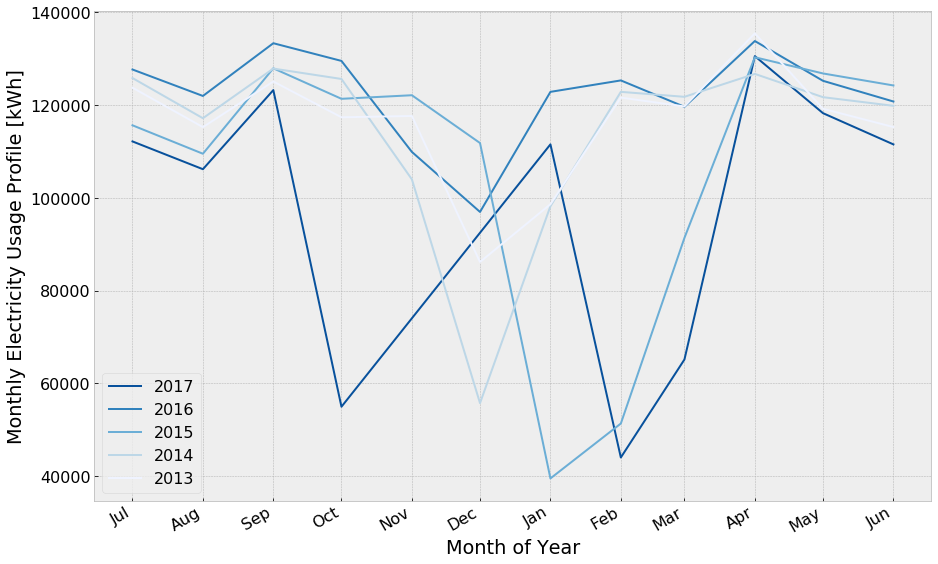

In [121]:
month_profile_filename = site + "_graph_pg6_g2.png"
gu.create_monthly_profile(electric_pivot_monthly, 'kWh', 'Monthly Electricity Usage Profile [kWh]', 'blue',
                         month_profile_filename)

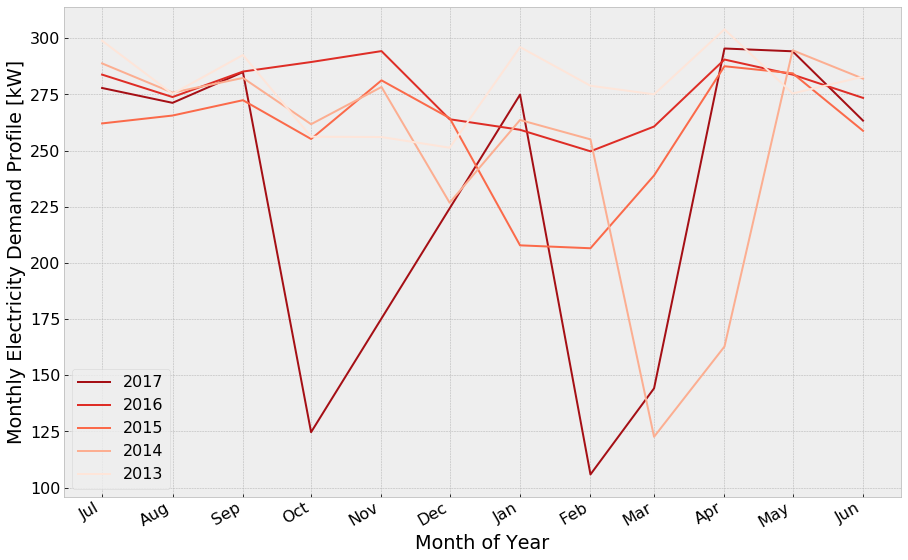

In [122]:
monthly_demand_filename = site + "_graph_pg7_g2.png"
gu.create_monthly_profile(electric_pivot_monthly, 'kW', 'Monthly Electricity Demand Profile [kW]', 'red', 
                          monthly_demand_filename)